In [1]:
import numpy as np 
import os 
import pandas as pd 
import datetime
import glob
import csv
import datetime
from datetime import datetime
from matplotlib import pyplot
from fbprophet import Prophet
import matplotlib.pyplot as plt

#https://facebook.github.io/prophet/docs/trend_changepoints.html
#https://xang1234.github.io/prophet/

In [2]:
#last 6 years
year = datetime.today().year
YEARS = [year - i for i in range(11)]

In [3]:
colnames=['Reported_Date'] 
col_list = ['Reported_Date']
types_dict = { 'Reported_Date': str,'Reported_Time': str, 'From_Date': str, 'From_Time': str,'To_Date': str, 'Offense': str, 'IBRS': str, 'Description': str, 'Beat': str, 'Address': str, 'City': str, 'Zip Code': str, 'Area' : str, 'DVFlag' : str, 'Involvement' : str, 'Race': str, 'Sex': str, 'Age': int, 'Firearm Used Flag': str}
path = r'../data' 
all_files = glob.glob(path + "/KCPD_Crime_Data_*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, usecols=col_list, header=0, na_values = "not available")
    print(filename)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame['Reported_Date'] = pd.to_datetime(frame['Reported_Date'])

../data\KCPD_Crime_Data_2011.csv
../data\KCPD_Crime_Data_2012.csv
../data\KCPD_Crime_Data_2013.csv
../data\KCPD_Crime_Data_2014.csv
../data\KCPD_Crime_Data_2015.csv
../data\KCPD_Crime_Data_2016.csv
../data\KCPD_Crime_Data_2017.csv
../data\KCPD_Crime_Data_2018.csv
../data\KCPD_Crime_Data_2019.csv
../data\KCPD_Crime_Data_2020.csv
../data\KCPD_Crime_Data_2021.csv


In [8]:
frame.sort_values(by=['Reported_Date'])
#df2 = frame.groupby(by=['Reported_Date'],dropna=False).sum()
df = frame.groupby('Reported_Date')['Reported_Date'].count().rename('Total_Crimes').reset_index()

In [9]:
df.columns = ['ds', 'y']

In [16]:
df.index = pd.to_datetime(df['ds'])

,ds,y
ds,,
2011-01-01,2011-01-01,364
2011-01-02,2011-01-02,309
2011-01-03,2011-01-03,362
2011-01-04,2011-01-04,320
2011-01-05,2011-01-05,405
...,...,...
2021-10-27,2021-10-27,240
2021-10-28,2021-10-28,194
2021-10-29,2021-10-29,216


,ds,y
0,2011-01-31,8903
1,2011-02-28,7976
2,2011-03-31,10081
3,2011-04-30,10879
4,2011-05-31,12036
...,...,...
125,2021-06-30,8116
126,2021-07-31,8442
127,2021-08-31,8454
128,2021-09-30,8543


In [25]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
df_Month =  df.resample('M').sum().reset_index() ##df2 = df.groupby(pd.Grouper(freq='M')).sum().reset_index()
df_Week =  df.resample('W').sum().reset_index()

In [27]:
df_Week

,ds,y
0,2011-01-02,673
1,2011-01-09,2121
2,2011-01-16,1736
3,2011-01-23,1991
4,2011-01-30,2125
...,...,...
561,2021-10-03,1827
562,2021-10-10,1779
563,2021-10-17,1937
564,2021-10-24,1784


Text(0, 0.5, 'Number of Crimes')

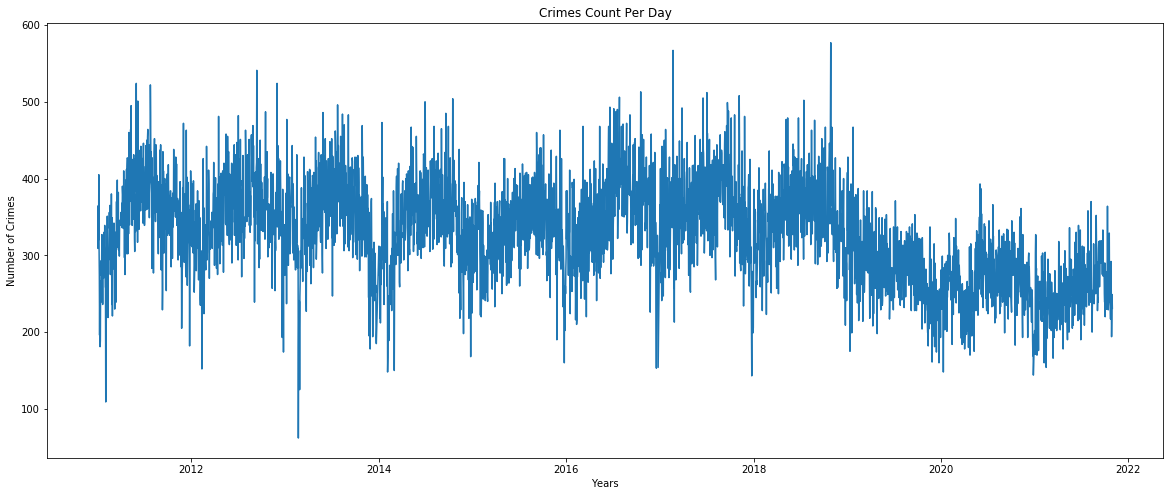

In [31]:
plt.figure(figsize = (20, 8))
plt.plot(df['y'])
plt.title('Crimes Count Per Day')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

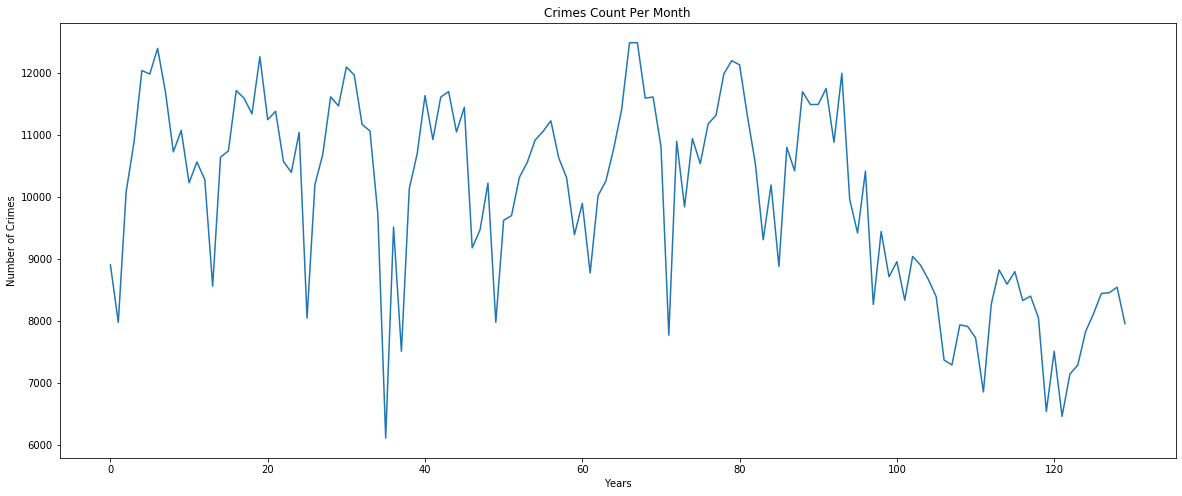

In [29]:
plt.figure(figsize = (20, 8))
plt.plot(df_Month['y'])
plt.title('Crimes Count Per Month')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

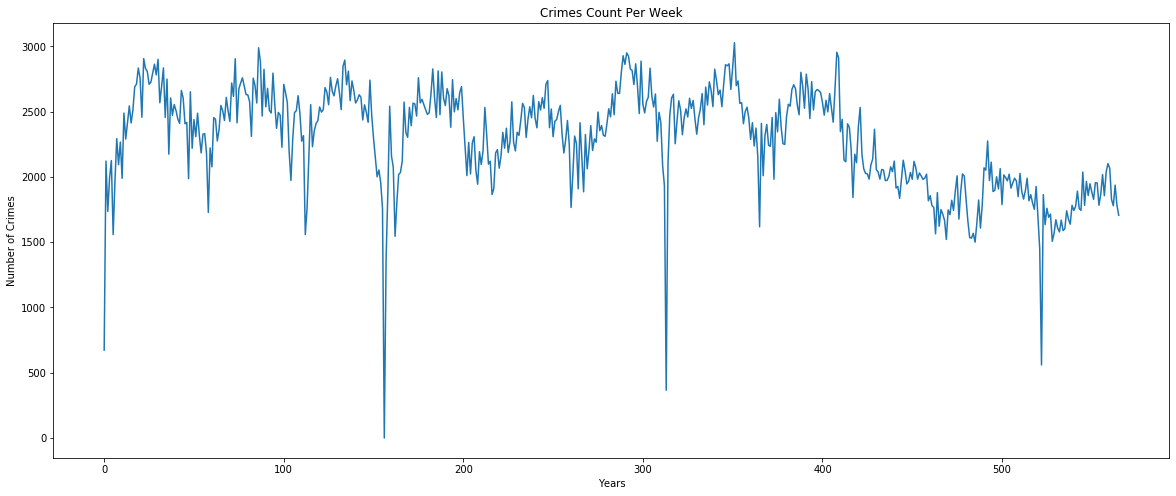

In [30]:
plt.figure(figsize = (20, 8))
plt.plot(df_Week['y'])
plt.title('Crimes Count Per Week')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [97]:
# Python
m = Prophet(daily_seasonality=True) #changepoint.prior.scale = 0.5
m.fit(df_Week)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\ISMAEL\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [99]:
future = m.make_future_dataframe(periods=52, freq='W') #future_air=model_air.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
613,2022-10-02
614,2022-10-09
615,2022-10-16
616,2022-10-23
617,2022-10-30


In [100]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\ISMAEL\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

C:\Users\ISMAEL\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,ds,yhat,yhat_lower,yhat_upper
613,2022-10-02,1540.215548,1254.592018,1823.321232
614,2022-10-09,1463.665772,1179.509405,1757.092876
615,2022-10-16,1431.306472,1159.780318,1738.469016
616,2022-10-23,1471.236677,1194.795753,1736.239316
617,2022-10-30,1511.887225,1221.055750,1782.448204


C:\Users\ISMAEL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\ISMAEL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\ISMAEL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



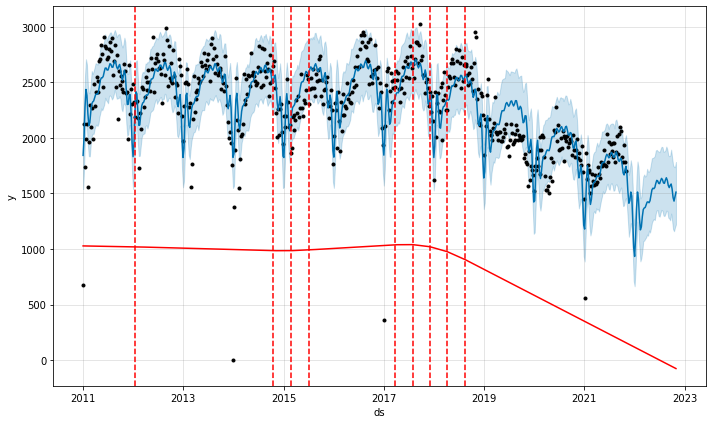

In [101]:
# Python
fig1 = m.plot(forecast)
from fbprophet.plot import add_changepoints_to_plot
a=add_changepoints_to_plot(fig1.gca(),m,forecast)

C:\Users\ISMAEL\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

C:\Users\ISMAEL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\ISMAEL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\ISMAEL\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

C:\Users\ISMAEL\Anaconda3\lib\site-pack

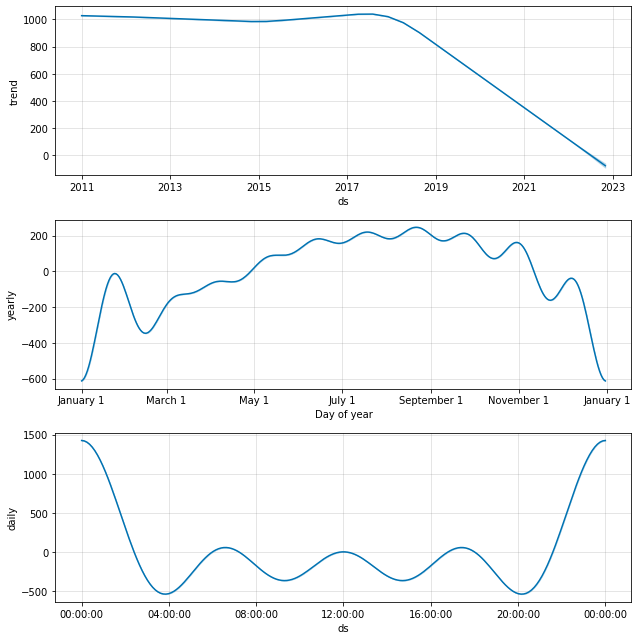

In [102]:
fig2 = m.plot_components(forecast)

In [103]:
# Python
#fig2 = m.plot_components(forecast)
import fbprophet
print(fbprophet.__version__)
#Error weekdays 
#https://github.com/facebook/prophet/issues/1309

0.5


In [104]:

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-02,1028.139726,1540.453850,2114.340458,1028.139726,1028.139726,814.729461,814.729461,814.729461,1425.467461,1425.467461,1425.467461,-610.738000,-610.738000,-610.738000,0.0,0.0,0.0,1842.869187
1,2011-01-09,1027.989225,1718.277215,2294.816772,1027.989225,1027.989225,977.359638,977.359638,977.359638,1425.467461,1425.467461,1425.467461,-448.107824,-448.107824,-448.107824,0.0,0.0,0.0,2005.348863
2,2011-01-16,1027.838724,2019.245083,2559.597717,1027.838724,1027.838724,1249.883094,1249.883094,1249.883094,1425.467461,1425.467461,1425.467461,-175.584368,-175.584368,-175.584368,0.0,0.0,0.0,2277.721818
3,2011-01-23,1027.688223,2148.980029,2707.976727,1027.688223,1027.688223,1407.984885,1407.984885,1407.984885,1425.467461,1425.467461,1425.467461,-17.482577,-17.482577,-17.482577,0.0,0.0,0.0,2435.673108
4,2011-01-30,1027.537722,2093.078173,2661.163941,1027.537722,1027.537722,1354.299133,1354.299133,1354.299133,1425.467461,1425.467461,1425.467461,-71.168329,-71.168329,-71.168329,0.0,0.0,0.0,2381.836855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,2022-10-02,-57.376522,1254.592018,1823.321232,-70.403470,-43.057776,1597.592070,1597.592070,1597.592070,1425.467461,1425.467461,1425.467461,172.124609,172.124609,172.124609,0.0,0.0,0.0,1540.215548
614,2022-10-09,-61.844260,1179.509405,1757.092876,-75.235462,-46.940334,1525.510032,1525.510032,1525.510032,1425.467461,1425.467461,1425.467461,100.042570,100.042570,100.042570,0.0,0.0,0.0,1463.665772
615,2022-10-16,-66.311998,1159.780318,1738.469016,-80.237385,-51.122239,1497.618470,1497.618470,1497.618470,1425.467461,1425.467461,1425.467461,72.151009,72.151009,72.151009,0.0,0.0,0.0,1431.306472
616,2022-10-23,-70.779736,1194.795753,1736.239316,-85.213225,-54.878333,1542.016413,1542.016413,1542.016413,1425.467461,1425.467461,1425.467461,116.548951,116.548951,116.548951,0.0,0.0,0.0,1471.236677


In [105]:
#import plotly.plotly as py
#from plotly.graph_objs import * 
#import plotly.tools as tls
from chart_studio import plotly
from fbprophet.plot import plot_plotly

#from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [120]:
np.abs((actual - pred))/ actual+0.0000000000001

C:\Users\ISMAEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in true_divide



array([1.73848440e+00, 5.46911834e-02, 3.12211982e-01, 2.23505776e-01,
       1.20941176e-01, 4.22978177e-01, 7.32079309e-02, 6.75970345e-02,
       6.68576886e-02, 1.63211292e-02, 1.68426345e-01, 6.30775412e-02,
       3.05676856e-02, 1.07660455e-02, 5.81761006e-02, 8.28843763e-03,
       3.90127389e-02, 8.25278810e-02, 7.04537071e-02, 1.03387438e-01,
       7.80116110e-02, 3.98860399e-02, 1.07019959e-01, 7.17061109e-02,
       6.41025641e-02, 3.69003690e-02, 4.18348624e-02, 5.54363376e-02,
       6.81103737e-02, 4.31499461e-02, 9.10344828e-02, 2.64797508e-02,
       1.00185529e-02, 4.93827160e-02, 9.03908795e-02, 4.11058567e-02,
       2.04691812e-01, 1.45873321e-02, 7.64563107e-02, 2.66249021e-02,
       1.67464115e-02, 3.06873977e-02, 6.30705394e-02, 2.02854996e-02,
       1.57510565e-02, 6.23182385e-03, 4.79933802e-02, 1.59033719e-01,
       1.00301659e-01, 7.70617395e-02, 9.14309143e-02, 1.51213172e-01,
       2.64067524e-01, 1.57395429e-01, 1.83150183e-02, 3.78169317e-02,
      

In [124]:
m = len(df_Week['y'])
pred = round(forecast['yhat'][:len(df_Month['y'])],0)
actual = df_Week['y']
actual, pred = np.array(actual), np.array(pred)
np.mean(np.abs((actual - pred) / actual)) * 100

SyntaxError: unexpected EOF while parsing (<ipython-input-124-887f8052a4bd>, line 5)

In [126]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

mean_absolute_percentage_error(actual, pred)
#median_absolute_error(actual, pred)

1.4521323886839496e+16

In [85]:
from sklearn.metrics import    explained_variance_score     
from sklearn.metrics import    mean_absolute_error  
from sklearn.metrics import    mean_squared_error   #rmse #squared=False If True returns MSE value, if False returns RMSE value.
from sklearn.metrics import   mean_squared_log_error   
from sklearn.metrics import     median_absolute_error    
from sklearn.metrics import     r2_score

In [95]:
 from sklearn.metrics import root_mean_squared_error 

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (C:\Users\ISMAEL\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [93]:
median_absolute_error(actual, pred)

437.0

In [79]:
round(forecast['yhat'][:len(df_Month['y'])],0)

0      10266.0
1       8614.0
2      10346.0
3      10456.0
4      11304.0
        ...   
125     8016.0
126     8335.0
127     8401.0
128     7807.0
129     7731.0
Name: yhat, Length: 130, dtype: float64

In [77]:
df_Month['y']

0       8903
1       7976
2      10081
3      10879
4      12036
       ...  
125     8116
126     8442
127     8454
128     8543
129     7955
Name: y, Length: 130, dtype: int64

In [72]:
# Python
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_Month)
df_p.head()

KeyError: 'cutoff'

KeyError: 'cutoff'

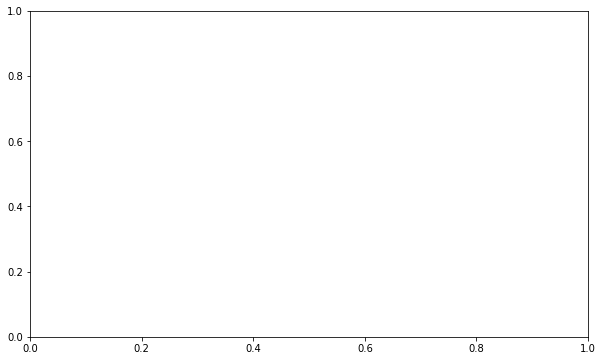

In [66]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_Month, metric='mape')


In [53]:
import fbprophet
print(fbprophet.__version__)
from fbprophet.plot import plot_plotly

0.5
